<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

**1.1 Откроем файлы и изучим их**

In [1]:
#библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotly import graph_objects as go
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
#индексируем таблицы по дате
full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date') 
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date') 

In [3]:
#посмотрим на содержание, проверим на дубликаты, оценим значения
for dataset in [full, train, test]:
    display(dataset.head(5))
    print()
    print(dataset.info())
    print('Кол-во дубликатов =', dataset.duplicated().sum())
    print()
    display(dataset.describe())
    print('---------------------------------------------------')

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                            

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


---------------------------------------------------


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                            

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


---------------------------------------------------


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-nul

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


---------------------------------------------------


В выборке test нет части признаков, которые есть в full и train, явных дубликатов нет, во всех таблицах есть пропущенные значения.
Целевые признаки - rougher.output.recovery, final.output.recovery

**1.2 Проверим расчет эффективности обогащения**

In [4]:
#функция расчета эффективности обогащения
def recovery_calc(rougher_output, rougher_input, rougher_tail):
    recovery = (rougher_output * (rougher_input - rougher_tail)) \
    / (rougher_input * (rougher_output - rougher_tail)) * 100
    return recovery

In [5]:
#определим эффективность обогащения на обучающей выборке для признака rougher.output.recovery:
recovery = recovery_calc(train['rougher.output.concentrate_au'],
                         train['rougher.input.feed_au'],
                         train['rougher.output.tail_au'])
#проверим
recovery

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14149, dtype: float64

In [6]:
#MAE между расчётами и значением признака rougher.output.recovery:
mae = mean_absolute_error(train['rougher.output.recovery'], recovery)
print('MAE между нашими расчётами и значением признака =', mae)

MAE между нашими расчётами и значением признака = 9.73512347450521e-15


MAE между нашими расчётами и значением признака rougher.output.recovery очень мала, значит, эффективность в выборке train рассчитана правильно.

**1.3. Анализ признаков недоступных в тестовой выборке**

In [7]:
#выделим признаки, которых нет в выборке test
unavailable_attributes = set(train.columns) - set(test.columns)
#посмотрим на тип признаков, оценим разницу и выясним, что это за параметры
train[unavailable_attributes].info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.output.concentrate_au               14149 non-null  float64
 1   rougher.output.concentrate_sol                      14127 non-null  float64
 2   rougher.output.recovery                             14149 non-null  float64
 3   final.output.tail_ag                                14149 non-null  float64
 4   final.output.concentrate_ag                         14148 non-null  float64
 5   rougher.calculation.floatbank11_sulfate_to_au_feed  14148 non-null  float64
 6   secondary_cleaner.output.tail_ag                    14147 non-null  float64
 7   final.output.concentrate_pb                         14148 non-null  float64
 8   rougher.calculation.floatbank10_sulfate_to_au_fee

В выборке test нет 34 признаков - 30 типа output (это параметры продукта) и 4 типа calculation (расчётные характеристики). Все признаки, которых нет в выборке test относятся к float. В выборку test следует добавить целевые признаки из full и на этапе обучения из train удалить признаки, которых нет в test.

**1.4. Предобработка данных**

In [8]:
#щценим количество пропусков
for dataset in [full, train, test]:
    print(dataset.isna().sum()[dataset.isna().sum()!=0].sort_values(ascending=False))
    print('---------------------------------------------------')

secondary_cleaner.output.tail_sol             1748
rougher.input.floatbank11_xanthate             453
rougher.state.floatbank10_e_air                436
primary_cleaner.output.concentrate_sol         370
secondary_cleaner.state.floatbank2_a_air       220
                                              ... 
primary_cleaner.state.floatbank8_c_level         1
primary_cleaner.state.floatbank8_b_level         1
primary_cleaner.state.floatbank8_a_level         1
final.output.tail_ag                             1
secondary_cleaner.state.floatbank6_a_level       1
Length: 63, dtype: int64
---------------------------------------------------
secondary_cleaner.output.tail_sol             1605
rougher.state.floatbank10_e_air                436
rougher.input.floatbank11_xanthate             428
primary_cleaner.output.concentrate_sol         286
secondary_cleaner.state.floatbank2_a_air       217
                                              ... 
rougher.state.floatbank10_a_air                  1
rough

In [9]:
#добавим в test целевые признаки из full по совпадению даты
test = test.merge(full[['final.output.recovery', 'rougher.output.recovery']],\
                  on='date', how='left')
test.shape

(5290, 54)

In [10]:
#заполним оставшиеся пропуски соседними по времени параметрами,
#по условию задачи они похожи, поэтому следующее непропущенное значение подойдет
train = train.fillna(method='bfill')
test = test.fillna(method='bfill')
#проверим
train.isna().values.any(), test.isna().values.any()

(False, False)

Вывод. Данные выгружены и подготовлены. Проверена правильность расчета эффективности обогащения в тренировочной выборке. Проанализированы признаки, недоступные в выборке test. Добавлены целевые признаки в тестовую выборку. Заполнены пропущенные значения в выборках train, test.

## Анализ данных

**2.1 Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки**

In [11]:
# для серебра из full достанем признаки rougher.input.feed_ag, rougher.output.concentrate_ag, 
#primary_cleaner.output.concentrate_ag и final.output.concentrate_ag
#(на этапе secondary_cleaner данных по концентрации нет)
concentrate_ag = full[['rougher.input.feed_ag',
                       'rougher.output.concentrate_ag',
                       'primary_cleaner.output.concentrate_ag',
                       'final.output.concentrate_ag'
                      ]].mean(axis=0)
concentrate_ag

rougher.input.feed_ag                     8.794927
rougher.output.concentrate_ag            11.994759
primary_cleaner.output.concentrate_ag     8.442408
final.output.concentrate_ag               5.168470
dtype: float64

In [12]:
#для свинца
concentrate_pb = full[['rougher.input.feed_pb',
                       'rougher.output.concentrate_pb',
                      'primary_cleaner.output.concentrate_pb',
                       'final.output.concentrate_pb'
                      ]].mean(axis=0)
concentrate_pb

rougher.input.feed_pb                    3.598085
rougher.output.concentrate_pb            7.606272
primary_cleaner.output.concentrate_pb    9.829530
final.output.concentrate_pb              9.978895
dtype: float64

In [13]:
#для золота
concentrate_au = full[['rougher.input.feed_au',
                       'rougher.output.concentrate_au',
                      'primary_cleaner.output.concentrate_au',
                       'final.output.concentrate_au'
                      ]].mean(axis=0)
concentrate_au

rougher.input.feed_au                     8.266097
rougher.output.concentrate_au            19.772000
primary_cleaner.output.concentrate_au    32.119400
final.output.concentrate_au              44.076513
dtype: float64

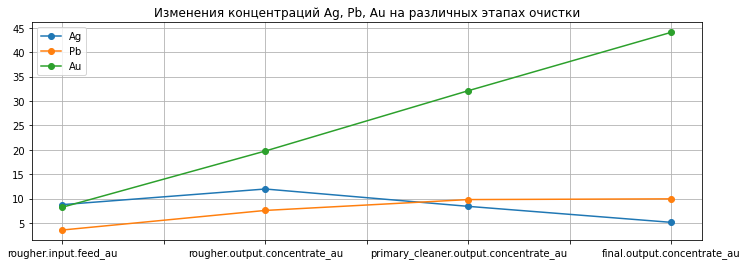

In [14]:
#для визуализации построим линейный график
concentrate_ag.plot(style='-o', grid=True, figsize=(12,4), label='Ag') 

concentrate_pb.plot(style='-o', grid=True, figsize=(12,4), label='Pb')

concentrate_au.plot(style='-o', grid=True, figsize=(12,4), label='Au')

plt.title('Изменения концентраций Ag, Pb, Au на различных этапах очистки')
plt.legend()
plt.show()

Концентрация Ag (серебро) падает с этапа флотации - вероятно, большое количество металла остается в отвальных хвостах, возможно следует обратить внимание на технологию очистки для серебра. Концентрация Pb (свинец) растет от этапа к этапу, но низкими темпами и неравномерно. Концентрация Au (золото) равномерно увеличивается от этапа к этапу относительно приличными темпами, технология очистки золота показывает хороший результат.

**2.2 Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках**

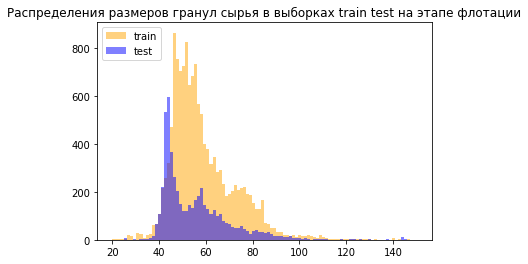

In [15]:
#сравним распределение размеров гранул на этапе флотации train и test
y1 = train['rougher.input.feed_size']
y2 = test['rougher.input.feed_size']

plt.hist(y1, bins=100, color='orange', label='train', range=(20, 150), alpha=0.5)
plt.hist(y2, bins=100, color='blue', label='test', range=(20, 150), alpha=0.5)
plt.rcParams['figure.figsize'] = (25, 15)
plt.legend(loc='upper left')
plt.title('Распределения размеров гранул сырья в выборках train test на этапе флотации')
plt.show()

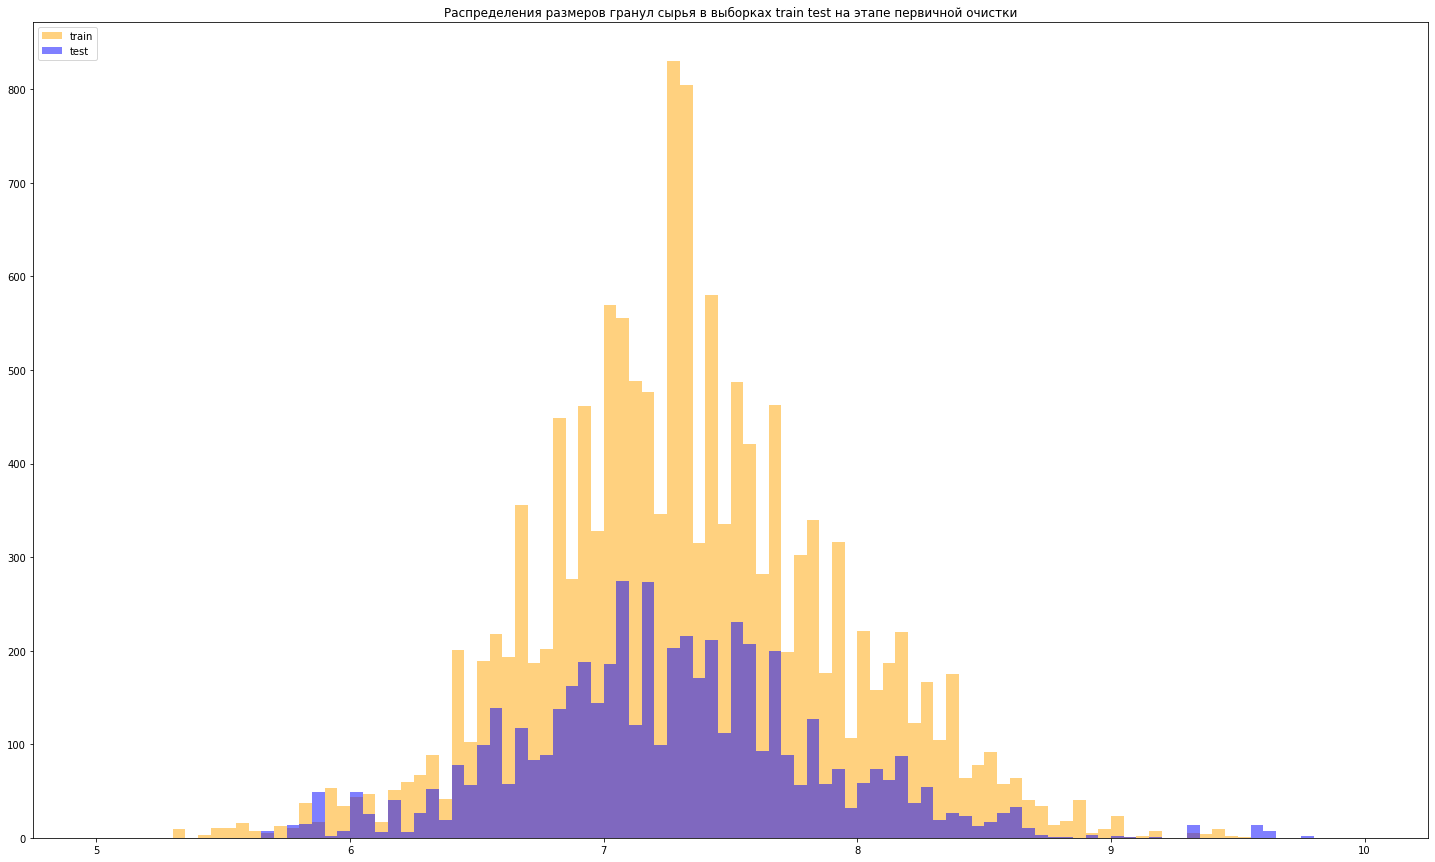

In [16]:
#на этапе первичной очистки
y1 = train['primary_cleaner.input.feed_size']
y2 = test['primary_cleaner.input.feed_size']

plt.hist(y1, bins=100, color='orange', label='train', range=(5, 10), alpha=0.5)
plt.hist(y2, bins=100, color='blue', label='test', range=(5, 10), alpha=0.5)
plt.rcParams['figure.figsize'] = (25, 15)
plt.legend(loc='upper left')
plt.title('Распределения размеров гранул сырья в выборках train test на этапе первичной очистки')
plt.show()

Видим, что на этапе флотации размеры гранул на обучающей выборке - до 55, на тестовой - до 45. На этапе первичной очистки размеры гранул на обучающей выборке - до 7.4, на тестовой - до 7.7. Распределение размеров гранул на этапе первичной очистки похоже на нормальное, на тестовой выборке объекты сконцентрированы в отрезке от 6.7 до 7.7, это может говорить о примерно одинаковом размере гранул на этом этапе.

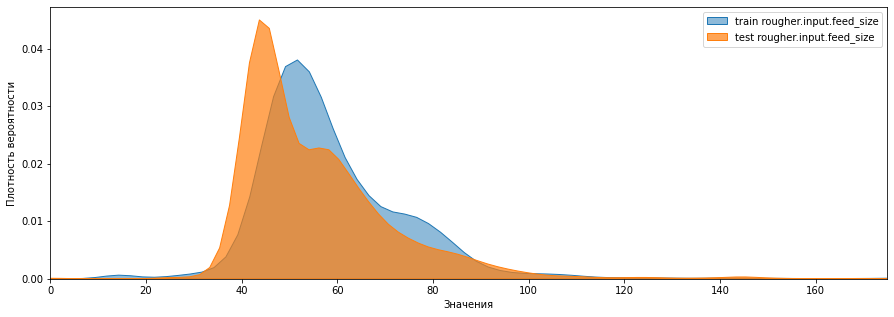

In [17]:
#распределение размера гранул на этапе флотации train test
plt.figure(figsize=(15, 5))
sns.kdeplot(train['rougher.input.feed_size'], label='train rougher.input.feed_size', alpha=0.5, shade=True)
sns.kdeplot(test['rougher.input.feed_size'], label='test rougher.input.feed_size', alpha=0.7, shade=True)
plt.xlim([0, 175])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right')
plt.show()

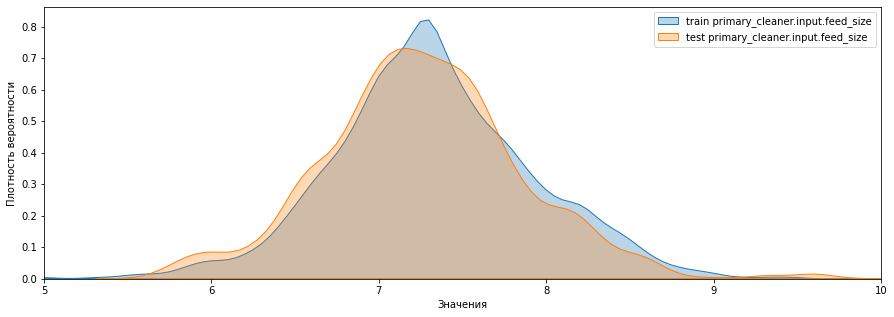

In [18]:
#распределение размера гранул на этапе первичной очистки train test
plt.figure(figsize=(15, 5))
sns.kdeplot(train['primary_cleaner.input.feed_size'], 
         label='train primary_cleaner.input.feed_size', alpha=0.3, shade=True)
sns.kdeplot(test['primary_cleaner.input.feed_size'],  
         label='test primary_cleaner.input.feed_size', alpha=0.3, shade=True)
plt.xlim([5, 10])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.legend(loc='upper right')
plt.show()

Вывод. Распределения похожи, это говорит об однородности данных размеров сырья в выборках train и test.

**2.3 Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах**

In [19]:
#построим таблицу суммарных концентраций для разных стадий
chart_concentrate = pd.DataFrame()

chart_concentrate['rougher.input'] = full['rougher.input.feed_ag'] \
+ full['rougher.input.feed_pb'] \
+ full['rougher.input.feed_sol'] \
+ full['rougher.input.feed_au']

chart_concentrate['rougher.output'] = full['rougher.output.concentrate_ag'] \
+ full['rougher.output.concentrate_pb'] \
+ full['rougher.output.concentrate_sol'] \
+ full['rougher.output.concentrate_au']

chart_concentrate['primary_cleaner.output'] = full['primary_cleaner.output.concentrate_ag'] \
+ full['primary_cleaner.output.concentrate_pb'] \
+ full['primary_cleaner.output.concentrate_sol'] \
+ full['primary_cleaner.output.concentrate_au']

chart_concentrate['final.output'] = full['final.output.concentrate_ag'] \
+ full['final.output.concentrate_pb'] \
+ full['final.output.concentrate_sol'] \
+ full['final.output.concentrate_au']

chart_concentrate.describe()

,rougher.input,rougher.output,primary_cleaner.output,final.output
count,19245.000000,19416.000000,19069.000000,19227.000000
mean,57.407926,68.188914,60.949928,68.727562
std,7.165219,12.478522,9.953770,7.423741
min,0.040000,0.000000,0.000000,0.000000
25%,53.660745,66.026048,59.165854,67.985659
50%,57.647093,70.186130,62.615189,69.632597
75%,62.012223,74.362878,65.725507,71.390461
max,76.978947,88.140119,80.749343,80.210644


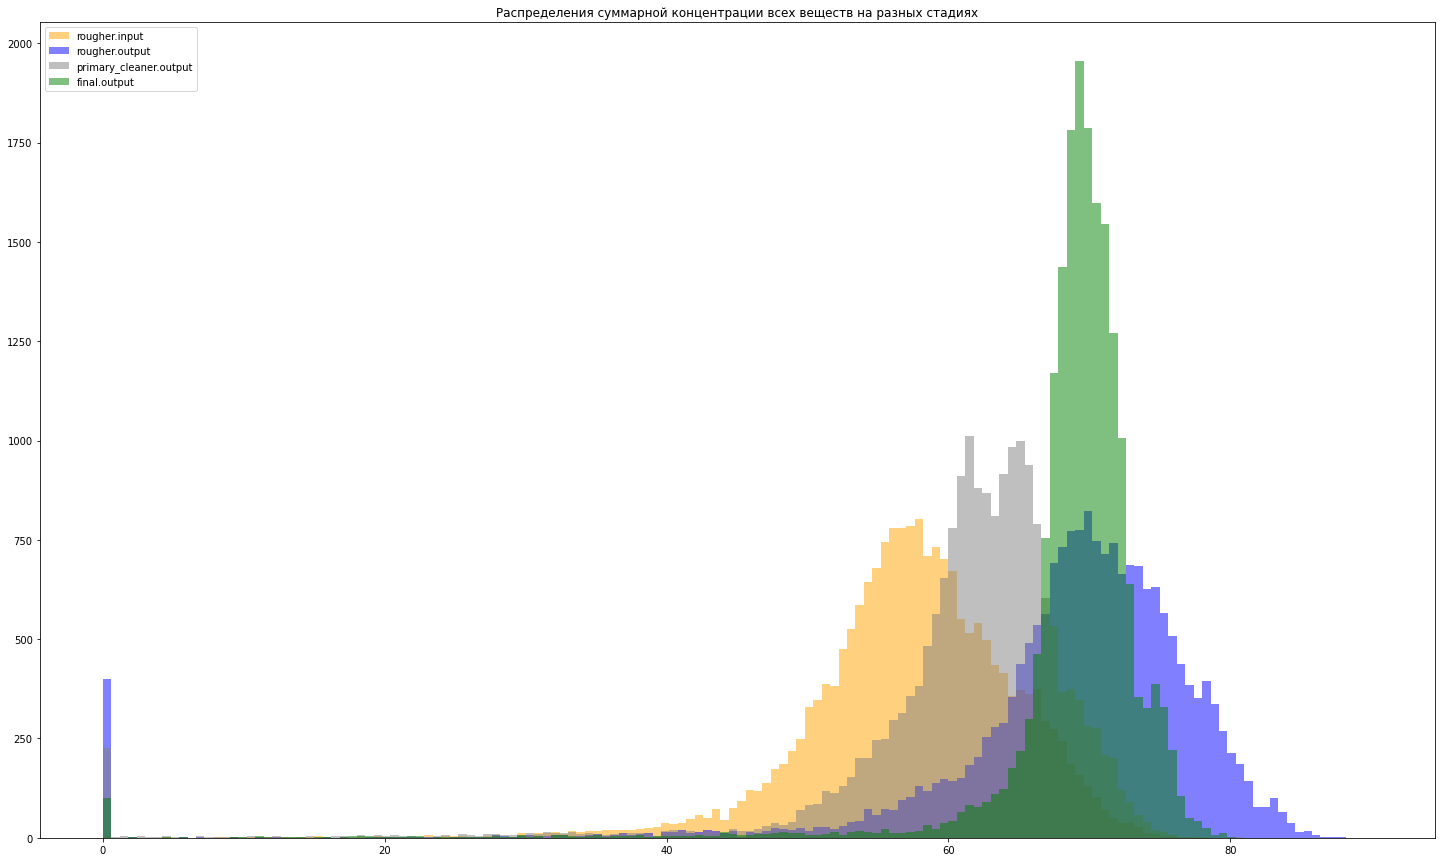

In [20]:
#построим гистограммы для стадий
y1 = chart_concentrate['rougher.input']
y2 = chart_concentrate['rougher.output']
y3 = chart_concentrate['primary_cleaner.output']
y4 = chart_concentrate['final.output']

plt.hist(y1, bins=150, color='orange', label='rougher.input', range=(0, 90), alpha=0.5)
plt.hist(y2, bins=150, color='blue', label='rougher.output', range=(0, 90), alpha=0.5)
plt.hist(y3, bins=150, color='grey', label='primary_cleaner.output', range=(0, 90), alpha=0.5)
plt.hist(y4, bins=150, color='green', label='final.output', range=(0, 90), alpha=0.5)

plt.rcParams['figure.figsize'] = (25, 15)
plt.legend(loc='upper left')
plt.title('Распределения суммарной концентрации всех веществ на разных стадиях')
plt.show()

Видим, что есть выбросы у нуля. Можно предположить, что это заборы руды не содержащие нужных металлов. Следует такие выбросы удалить, чтобы сконцентрироваться только на эффективных заборах руды (границу концентрации определю как 1, все что меньше убираем). Этап final.output указывает на распределение максимума концентраций на отрезке от 65 до 75.

In [21]:
#для full убираем концентрацию до 1:
full = full[(full['rougher.input.feed_ag'] >= 1) &
            (full['rougher.input.feed_pb'] >= 1) &
            (full['rougher.input.feed_sol'] >= 1) &
            (full['rougher.input.feed_au'] >= 1) &
            (full['rougher.output.concentrate_ag'] >= 1) &
            (full['rougher.output.concentrate_pb'] >= 1) &
            (full['rougher.output.concentrate_sol'] >= 1) &
            (full['rougher.output.concentrate_au'] >= 1) &
            (full['primary_cleaner.output.concentrate_ag'] >= 1) &
            (full['primary_cleaner.output.concentrate_pb'] >= 1) &
            (full['primary_cleaner.output.concentrate_sol'] >= 1) &
            (full['primary_cleaner.output.concentrate_au'] >= 1) &
            (full['final.output.concentrate_ag'] >= 1) &
            (full['final.output.concentrate_pb'] >= 1) &
            (full['final.output.concentrate_sol'] >= 1) &
            (full['final.output.concentrate_au'] >= 1)]

In [22]:
#для train убираем концентрацию до 1:
train = train[(train['rougher.input.feed_ag'] >= 1) &
            (train['rougher.input.feed_pb'] >= 1) &
            (train['rougher.input.feed_sol'] >= 1) &
            (train['rougher.input.feed_au'] >= 1) &
            (train['rougher.output.concentrate_ag'] >= 1) &
            (train['rougher.output.concentrate_pb'] >= 1) &
            (train['rougher.output.concentrate_sol'] >= 1) &
            (train['rougher.output.concentrate_au'] >= 1) &
            (train['primary_cleaner.output.concentrate_ag'] >= 1) &
            (train['primary_cleaner.output.concentrate_pb'] >= 1) &
            (train['primary_cleaner.output.concentrate_sol'] >= 1) &
            (train['primary_cleaner.output.concentrate_au'] >= 1) &
            (train['final.output.concentrate_ag'] >= 1) &
            (train['final.output.concentrate_pb'] >= 1) &
            (train['final.output.concentrate_sol'] >= 1) &
            (train['final.output.concentrate_au'] >= 1)]

In [23]:
#для test убираем концентрацию до 1:
test = test[(test['rougher.input.feed_ag'] >= 1) &
            (test['rougher.input.feed_pb'] >= 1) &
            (test['rougher.input.feed_sol'] >= 1) &
            (test['rougher.input.feed_au'] >= 1)]

Вывод. Концентрация Ag (серебро) падает с этапа флотации. Концентрация Pb и Au растет от этапа к этапу, но темпы роста концентрация Au (золото) выше. На этапе флотации размеры гранул на обучающей выборке - до 55, на тестовой - до 45. На этапе первичной очистки размеры гранул уменьшаются - на обучающей выборке - до 7.4, на тестовой - до 7.7. На тестовой выборке размеры гранул сконцентрированы в отрезке от 6.7 до 7.7, это свидетельствует о примерно одинаковом размере гранул на этом этапе. Этап final.output указывает на распределение максимума концентраций на отрезке от 65 до 75, технология очистки приносит результат. Выбросы в данных у нуля удалили, природу их возникновения примерно объяснили.

## Модель

**3.1 Функция для вычисления итоговой sMAPE**

In [24]:
#напишем функцию для вычисления sMAPE
def sMAPE_calc(y_target, y_predict):
    return np.mean(abs(y_target - y_predict)/((abs(y_target)+abs(y_predict))/2))*100

In [25]:
#напишем функцию для вычисления финального sMAPE
def final_sMAPE_calc(smape_rougher, smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)

**3.2 Обучение моделей. Оценка их качества кросс-валидацией. Выбор лучшей модели и проверка её на тестовой выборке**

In [26]:
#разделим обучающую выборку на признаки
features_train = np.array(train.drop(['rougher.output.recovery', 'final.output.recovery',
                                     'rougher.output.concentrate_au', 'primary_cleaner.output.tail_pb',
                                      'final.output.concentrate_au', 'primary_cleaner.output.concentrate_pb',
                                      'final.output.tail_sol',
                                      'rougher.calculation.floatbank10_sulfate_to_au_feed',
                                      'rougher.output.tail_sol', 'final.output.tail_au',
                                      'primary_cleaner.output.concentrate_ag',
                                      'rougher.calculation.floatbank11_sulfate_to_au_feed',
                                      'rougher.output.tail_ag', 'rougher.output.tail_pb',
                                      'secondary_cleaner.output.tail_pb', 'final.output.tail_ag',
                                      'final.output.concentrate_sol', 'primary_cleaner.output.tail_au',
                                      'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_ag',
                                      'rougher.output.tail_au', 'rougher.output.concentrate_ag',
                                      'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_pb',
                                      'final.output.concentrate_ag', 'secondary_cleaner.output.tail_au',
                                      'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
                                      'primary_cleaner.output.tail_sol',
                                      'rougher.calculation.sulfate_to_au_concentrate',
                                      'final.output.tail_pb', 'primary_cleaner.output.concentrate_au',
                                      'primary_cleaner.output.tail_ag', 'rougher.calculation.au_pb_ratio'], 
                                     axis=1)) 

target_train_rougher = np.array(train['rougher.output.recovery'])
target_train_final = np.array(train['final.output.recovery'])
#размеры
for sample in [features_train, target_train_rougher, target_train_final]:
    print(sample.shape)

(13323, 52)
(13323,)
(13323,)


In [27]:
#создадим свою метрику через make_scorer, чтобы не делать кросс-валидацию руками
score = make_scorer(sMAPE_calc, greater_is_better = False) 
#для оптимизации процесса обработки данных применим make_pipeline 
#будем использовать алгоритмы LinearRegression, DecisionTreeRegressor, RandomForestRegressor
model_rfr = make_pipeline(StandardScaler(), RandomForestRegressor())
model_dtr = make_pipeline(StandardScaler(), DecisionTreeRegressor())
model_lr = make_pipeline(StandardScaler(), LinearRegression())

In [28]:
#задаем параметры для моделей
parameters_rfr = {'randomforestregressor__n_estimators':[1,100],
                  'randomforestregressor__max_depth':[1,10],
                  'randomforestregressor__random_state':[12345]}

parameters_dtr = {'decisiontreeregressor__max_depth':[1,10]}

parameters_lr = {'linearregression__normalize':[False]}

In [29]:
# используем GridSearchCV для оптимизации гиперпараметров и для кросс-валидации
grid_rougher_rfr = GridSearchCV(model_rfr, param_grid=parameters_rfr, cv=5, scoring=score)
grid_final_rfr = GridSearchCV(model_rfr, param_grid=parameters_rfr, cv=5, scoring=score)

grid_rougher_dtr = GridSearchCV(model_dtr, param_grid=parameters_dtr, cv=5, scoring=score)
grid_final_dtr = GridSearchCV(model_dtr, param_grid=parameters_dtr, cv=5, scoring=score)

grid_rougher_lr = GridSearchCV(model_lr, param_grid=parameters_lr, scoring=score)
grid_final_lr = GridSearchCV(model_lr, param_grid=parameters_lr, scoring=score)

In [30]:
#обучаем модели
grid_rougher_rfr.fit(features_train, target_train_rougher)
grid_final_rfr.fit(features_train, target_train_final)

grid_rougher_dtr.fit(features_train, target_train_rougher)
grid_final_dtr.fit(features_train, target_train_final)

grid_rougher_lr.fit(features_train, target_train_rougher)
grid_final_lr.fit(features_train, target_train_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__normalize': [False]},
             scoring=make_scorer(sMAPE_calc, greater_is_better=False))

In [31]:
#определим лучшую модель для целевых признаков
best_score_rougher_rfr = grid_rougher_rfr.best_score_
best_score_final_rfr = grid_final_rfr.best_score_

best_score_rougher_dtr = grid_rougher_dtr.best_score_
best_score_final_dtr = grid_final_dtr.best_score_

best_score_rougher_lr = grid_rougher_lr.best_score_
best_score_final_lr = grid_final_lr.best_score_

print('Модель RandomForestRegressor лучший rougher =', best_score_rougher_rfr)
print('Модель DecisionTreeRegressor лучший rougher =', best_score_rougher_dtr)
print('МодельLinearRegression       лучший rougher =', best_score_rougher_lr)
print()
print('Модель RandomForestRegressor лучший final =', best_score_final_rfr)
print('Модель DecisionTreeRegressor лучший final =', best_score_final_dtr)
print('Модель LinearRegression      лучший final =', best_score_final_lr)

Модель RandomForestRegressor лучший rougher = -6.608575338235129
Модель DecisionTreeRegressor лучший rougher = -7.789665181105777
МодельLinearRegression       лучший rougher = -7.0262230176549565

Модель RandomForestRegressor лучший final = -9.122276801938472
Модель DecisionTreeRegressor лучший final = -9.205603540291156
Модель LinearRegression      лучший final = -10.564142056403265


In [32]:
#считаем final sMAPE для каждой модели
final_smape_rfr = final_sMAPE_calc(best_score_rougher_rfr, best_score_final_rfr)
print('Модель RandomForestRegressor итоговое sMAPE =', final_smape_rfr)

final_smape_dtr = final_sMAPE_calc(best_score_rougher_dtr, best_score_final_dtr)
print('Модель DecisionTreeRegressor итоговое sMAPE =', final_smape_dtr)

final_smape_lr = final_sMAPE_calc(best_score_rougher_lr, best_score_final_lr)
print('Модель LinearRegression      итоговое sMAPE =', final_smape_lr)

Модель RandomForestRegressor итоговое sMAPE = -8.493851436012637
Модель DecisionTreeRegressor итоговое sMAPE = -8.85161895049481
Модель LinearRegression      итоговое sMAPE = -9.679662296716188


In [33]:
#на тестовой выборке считаем final sMAPE по лидеру - RandomForestRegressor
features_test = np.array(test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1))
target_test_rouger = np.array(test['rougher.output.recovery'])
target_test_final = np.array(test['final.output.recovery'])

test_rogher = grid_rougher_rfr.predict(features_test) 
test_final = grid_final_rfr.predict(features_test)

rouger_smape_test = sMAPE_calc(target_test_rouger, test_rogher)
final_smape_test = sMAPE_calc(target_test_final, test_final)

final_smape = final_sMAPE_calc(rouger_smape_test, final_smape_test)
print('Симметричная средняя абсолютная процентная ошибка на тестовой выборке =',\
      round(final_smape,3))

Симметричная средняя абсолютная процентная ошибка на тестовой выборке = 9.008


Мы провели обучение на тренировочной выборке 3 (трех) моделей - RandomForestRegressor, DecisionTreeRegressor и LinearRegression с применением кросс-валидации. RandomForestRegressor показал лучшие метрики качества. Поэтому проверку на тестовой выборке проводили на нем. Симметричная средняя абсолютная процентная ошибка на тестовой выборке - 9.008.

**Проверка модели на адекватность**

In [34]:
for strategy in ['mean', 'median']:
    dummy_rougher = DummyRegressor(strategy=strategy)
    dummy_final = DummyRegressor(strategy=strategy)
    
    dummy_rougher.fit(features_train, target_train_rougher)
    dummy_final.fit(features_train, target_train_final)
    
    rougher = dummy_rougher.predict(test)
    final = dummy_final.predict(test)
    
    final_smape = final_sMAPE_calc(sMAPE_calc(target_test_rouger, rougher),
                                   sMAPE_calc(target_test_final, final))

    print('Для стратегии', strategy, 'итоговая sMAPE =', round(final_smape,3))

Для стратегии mean итоговая sMAPE = 9.635
Для стратегии median итоговая sMAPE = 9.304


В сравнении с константной моделью значения метрик, показанные моделью RandomForestRegressor выше. Считаем, что модель RandomForestRegressor прошла проверку на адекватность.

Общий вывод. В рамках проекта изучены загруженные файлы. Проверена корректность расчета эффективности обогащения в тренировочной выборке. Проанализированы признаки, недоступные в выборке test. Добавлены целевые признаки в тестовую выборку. Заполнены пропущенные значения в выборках train, test. Установлено, что концентрация Ag (серебро) падает с этапа флотации. Исследованы суммарные концентрации всех веществ на разных стадиях. Концентрация Pb и Au растет от этапа к этапу, но темпы роста концентрация Au (золото) выше. На этапе флотации размеры гранул на обучающей выборке - до 55, на тестовой - до 45. На этапе первичной очистки размеры гранул уменьшаются - на обучающей выборке - до 7.4, на тестовой - до 7.7. На тестовой выборке размеры гранул сконцентрированы в отрезке от 6.7 до 7.7, это свидетельствует о примерно одинаковом размере гранул на этом этапе. Этап final.output указывает на распределение максимума концентраций на отрезке от 65 до 75, технология очистки приносит результат. Также удалили выбросы в данных у нуля. 
Мы провели обучение на тренировочной выборке 3 (трех) моделей - случайный лес, дерево решений и линейную регрессию с применением кросс-валидации. Случайный лес показал лучшие метрики качества. Поэтому проверку на тестовой выборке проводили на нем. Симметричная средняя абсолютная процентная ошибка на тестовой выборке - 9.008. Проведена проверка модели на адекватность. Лучшая итоговая оценка smape константной модели на тестовых данных равна 9.304.
Прототипом модели машинного обучения для «Цифры» рекомендуем модель RandomForestRegressor, так как эта модель предсказывает коэффициент восстановления золота из золотосодержащей руды наилучшим образом.